# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Shinta Amalia Paradita
- **Email:** saprdtaa7@gmail.com
- **ID Dicoding:** shintamaliiaa

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara periode harian dan tahunan di Tiantan?
- Apa polutan yang paling banyak di Tiantan?

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

### Gathering Data

In [24]:
# memasukkan dataset
tiantan_df = pd.read_csv("data_1.csv")

# menampilkan kolom pertama pada dataset
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


### Assessing Data

In [26]:
# melihat tipe data ada yang salah apa tidak
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
# melihat missing value
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [27]:
# melihat jumlah duplikasi pada dataset
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [28]:
tiantan_df.dropna(inplace=True)

In [29]:
# melihat overview dari dataset

def dataoverview(tiantan_df, message):
  print(f'{message}:\n')
  print("Rows:", tiantan_df.shape[0])
  print("\n NUmber of features:", tiantan_df.shape[1])
  print("\n Features:")
  print(tiantan_df.columns.tolist())
  print("\n Missing Values:", tiantan_df.isna().sum().values.sum())
  print("\n Unique values:")
  print(tiantan_df.nunique())

dataoverview(tiantan_df,'Overview of the Dataset')

Overview of the Dataset:

Rows: 32843

 NUmber of features: 18

 Features:
['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values: 0

 Unique values:
No         32843
year           5
month         12
day           31
hour          24
PM2.5        515
PM10         619
SO2          186
NO2          228
CO           115
O3           547
TEMP         933
PRES         595
DEWP         617
RAIN         117
wd            16
WSPM         101
station        1
dtype: int64


## Exploratory Data Analysis (EDA)

In [30]:
# kolom-kolom yang mengandung polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari nilai yang paling umum untuk setiap polutan
most_common_pollutants = {}
for pollutant in pollutants:
    most_common_pollutant = tiantan_df[pollutant].mode().values[0]
    most_common_pollutants[pollutant] = most_common_pollutant

# menampilkan polutan udara yang paling banyak dalam datset
print("Polutan udara yang paling banyak:")
for pollutant, value in most_common_pollutants.items():
    print(f"{pollutant}: {value}")

Polutan udara yang paling banyak:
PM2.5: 3.0
PM10: 21.0
SO2: 2.0
NO2: 26.0
CO: 400.0
O3: 2.0


### Explore ...

In [31]:
# kolom-kolom yang mengandung polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = {}
for pollutant in pollutants:
    count = tiantan_df[pollutant].mode().values[0]
    pollutant_counts[pollutant] = count

# Menentukan polutan udara yang paling banyak di dataset
most_common_pollutant = max(pollutant_counts, key=pollutant_counts.get)

print(f"Polutan terbanyak yaitu: {most_common_pollutant}")

Polutan terbanyak yaitu: CO


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana kualitas udara periode harian dan tahunan di Tiantan?

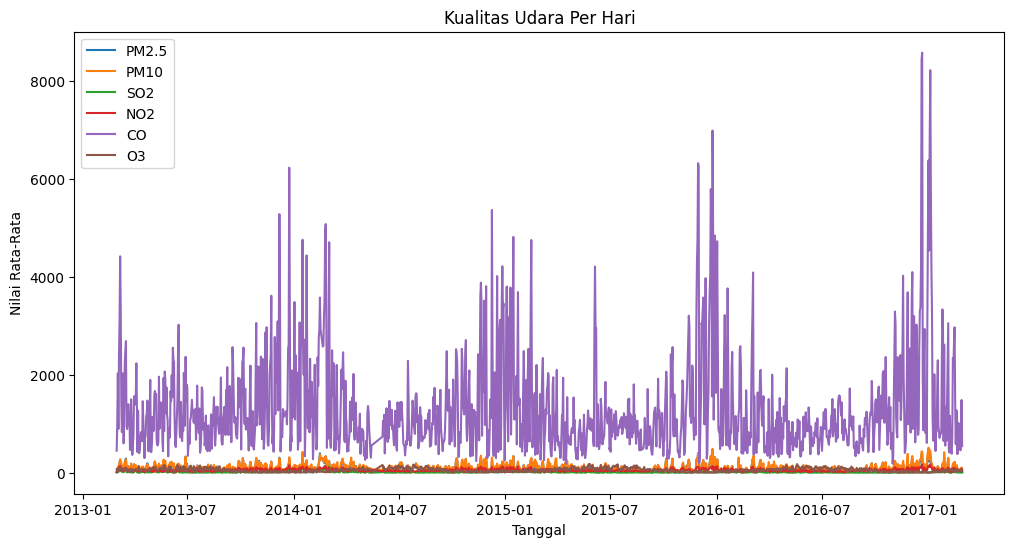

In [32]:
# Kolom-kolom yang mengandung data polutan udara
tiantan_df['date'] = pd.to_datetime(tiantan_df[['year', 'month', 'day']])

# mencari frekuensi munculnya masing-masing polutan
daily_data = tiantan_df.groupby('date').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})
plt.figure(figsize=(12, 6))
for column in daily_data.columns:
    plt.plot(daily_data.index, daily_data[column], label=column)

# membuat visualisasi data
plt.title('Kualitas Udara Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

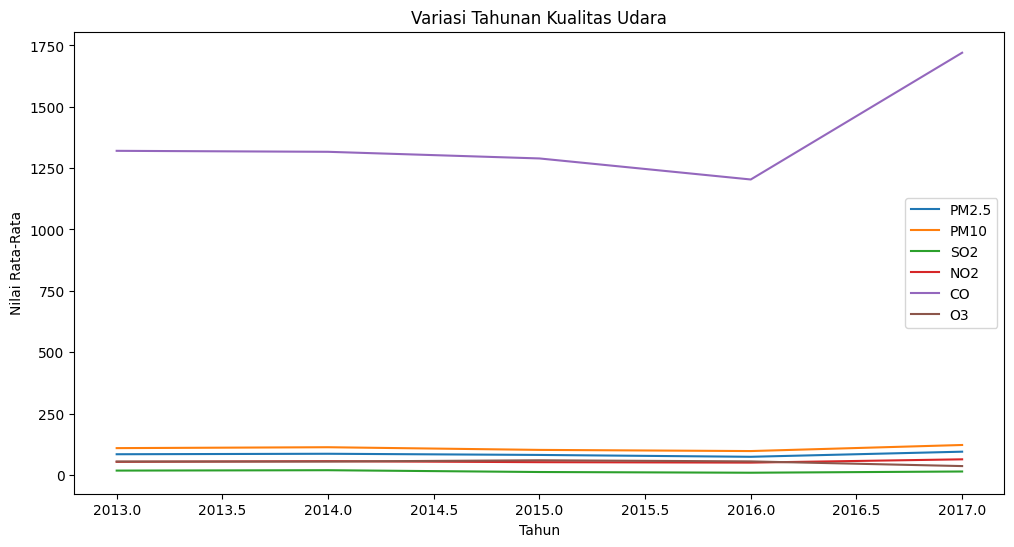

In [33]:
annual_data = tiantan_df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data tahunan
plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

### Pertanyaan 2:

Apa polutan yang paling banyak di Tiantan?

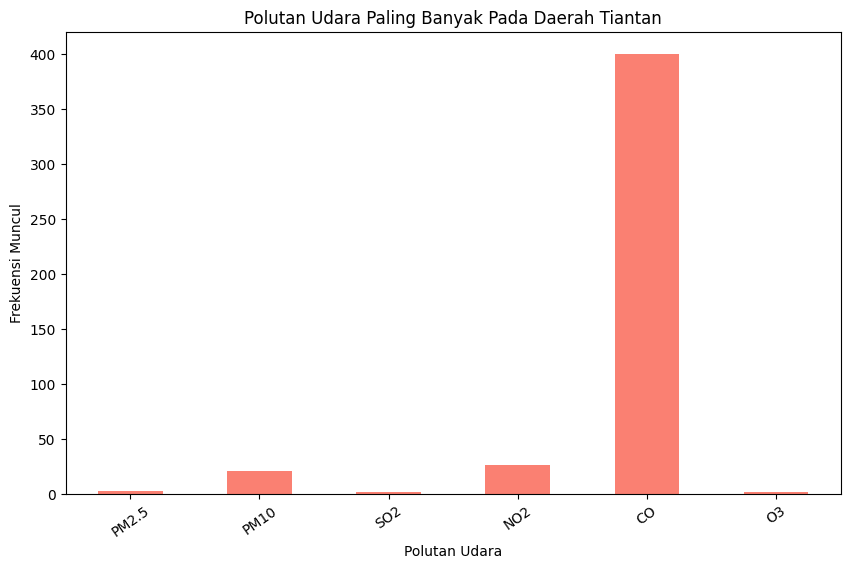

In [35]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

pollutant_counts = tiantan_df[pollutants].mode().iloc[0]
plt.figure(figsize=(10, 6))
pollutant_counts.plot(kind='bar', color='salmon')

# membuat visualisasi data dengan diagram bar
plt.title('Polutan Udara Paling Banyak Pada Daerah Tiantan')
plt.xlabel('Polutan Udara')
plt.ylabel('Frekuensi Muncul')
plt.xticks(rotation=35)
plt.show()

## Conclusion



```
# This is formatted as code
```
- Bedasarkan analisis harian, kuliatas udara harian dan tahunan di Dongsi paling tinggi ada pada tahun 2017 dengan CO menempati polutan paling tinggi yang mencapai nilai rata-rata hampir 1750
- Polutan udara paling banyak di Dongsi ialah CO dengan frekuensi kemunculannya yaitu 400